## 1 梯队下降法:
### 1.1 梯队
比如一个一个函数$f(x, y)$，那么 $f$ 的梯度就是 

$$
(\frac{\partial f}{\partial x},\ \frac{\partial f}{\partial y})
$$

可以称为 $grad f(x, y)$ 或者 $\nabla f(x, y)$。具体某一点 $(x_0,\ y_0)$ 的梯度就是 $\nabla f(x_0,\ y_0)$。

### 1.2 学习率
- 来沿着梯度的反方向，我们能够更快地找到函数的最小值点
- 我们需要每次往下走的那一步的长度，这个长度称为学习率，用  𝜂  表示
- 学习率太小会导致下降非常缓慢
- 学习率太大又会导致跳动非常明显

### 1.3 线性回归的参数的误差更新公式
线性回归的公式:
$$
\hat{y}_i = w x_i + b
$$
$\hat{y}_i$ 是我们预测的结果，希望通过 $\hat{y}_i$ 来拟合目标 $y_i$，通俗来讲就是找到这个函数拟合 $y_i$ 使得误差最小，即最小化损失函数定义为

$$
J=\frac{1}{n} \sum_{i=1}^n(\hat{y}_i - y_i)^2
$$
   $J$对$w,b$求偏导, 微分得到 ${w}_{i+1}$ 和 ${w}_i$的关系,${b}_{i+1}$ 和 ${b}_i$的关系如下

$$
w := w - \eta \frac{\partial f(w,\ b)}{\partial w} \\
b := b - \eta \frac{\partial f(w,\ b)}{\partial b}
$$
通过不断地迭代更新，最终我们能够找到一组最优的 w 和 b，这就是梯度下降法的原理。
w 和 b 的梯度分别是

$$
\frac{\partial J}{\partial w} = \frac{2}{n} \sum_{i=1}^n x_i(w x_i + b - y_i) \\
\frac{\partial J}{\partial b} = \frac{2}{n} \sum_{i=1}^n (w x_i + b - y_i)
$$


## 2 代码实现
导入包

In [17]:
import torch
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
# 定义随机因子
torch.manual_seed(2019)

### 2.1 创建张量tensor(测试样本数据)
tensor的使用接口和 numpy 非常相似

In [18]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)
# 转换成 Tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

### 2.2 创建变量Variable
Variable 是对 tensor 的封装，操作和 tensor 是一样的，但是每个 Variabel都有三个属性，Variable 中的`.data`，梯度`.grad`以及这个 Variable 是通过什么方式得到的`.grad_fn`。

In [19]:
# 定义参数 w 和 b
w = Variable(torch.randn(1), requires_grad=True) # 随机初始化
b = Variable(torch.zeros(1), requires_grad=True) # 使用 0 进行初始化
x_train = Variable(x_train)
y_train = Variable(y_train)

### 2.3 构建模型

In [20]:
def linear_model(x):
    return x * w + b

In [21]:
y_ = linear_model(x_train)

In [22]:
# 计算误差
def get_loss(y_, y):
    return torch.mean((y_ - y_train) ** 2)

### 2.4 训练模型

初始的参数的模型

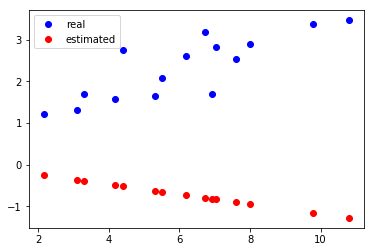

In [23]:
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

In [24]:
loss = get_loss(y_, y_train)
# 打印一下看看 loss 的大小
print(loss)

tensor(10.2335, grad_fn=<MeanBackward1>)


#### 2.4.1 误差函数求偏导
PyTorch 的自动求导，我们不需要手动去算梯度

In [25]:
# 自动求导
loss.backward()

### 2.4.2 第一次更新参数

tensor([-41.1289])
tensor([-6.0890])


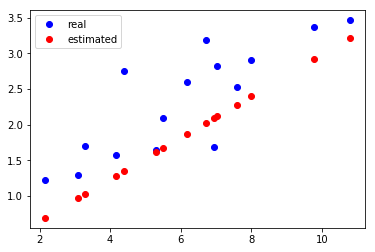

In [26]:
print(w.grad)
print(b.grad)
# 更新一次参数
w.data = w.data - 1e-2 * w.grad.data
b.data = b.data - 1e-2 * b.grad.data
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

### 2.4.3 进行30次更新

In [27]:
for e in range(101): # 进行 30 次更新
    y_ = linear_model(x_train)
    loss = get_loss(y_, y_train)
    w.grad.zero_() # 记得归零梯度
    b.grad.zero_() # 记得归零梯度
    # 自动求导,计算梯队
    loss.backward()
    # 使用梯队更新参数
    w.data = w.data - 1e-2 * w.grad.data # 更新 w
    b.data = b.data - 1e-2 * b.grad.data # 更新 b 
    if e%50==0:
        print('epoch: {}, loss: {}'.format(e, loss.item()))

epoch: 0, loss: 0.4142104387283325
epoch: 50, loss: 0.2154277265071869
epoch: 100, loss: 0.20488114655017853


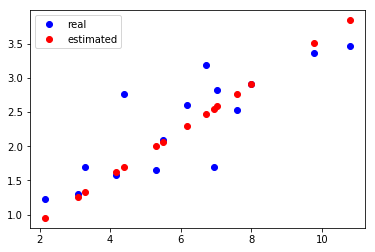

In [28]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()